#![image.png](https://bkpsitecpsnew.blob.core.windows.net/uploadsitecps/sites/37/2024/03/fatec-votorantim.png)


# **Sobre o Projeto Integrador**

**Dados:** Aleatórios para a atividade de Análise e Visualização de Dados da empresa com Pandas e Pandera

**Fonte:** Dados randômicos, utilizando a biblioteca **FAKER** (https://faker.readthedocs.io/en/master/)

**Autor:** Grupo 02 - CDN - Fatec votorantim

**Atualização:** 23/11/2024

#**Proposta do exercício:**

 **Objetivo:** Este exercício tem como objetivo fornecer aos alunos uma experiência prática em manipulação, validação, limpeza e visualização de dados, simulando um cenário de uma área da empresa (Vendas, Produção, Compras, etc.). **Não utilizar o RH**, pois os exemplos serão nesta área. O trabalho envolve a criação de um dataset do departamento escolhido, análise exploratória de dados, e visualização de informações relevantes, além de validação e limpeza de dados usando bibliotecas específicas.

#***Bibliotecas***

**Pandas:** Biblioteca para manipulação de dados em dataframe. (https://pandas.pydata.org/)

**Numpy:** Biblioteca para manipulação de dados numéricos. (https://numpy.org/)

**Pandera**: Biblioteca utilizada para validação dos dados e da estrutura. (https://pandera.readthedocs.io/en/stable/index.html)

**Seanborn:** Biblioteca para visualização de dados estatísticos. (https://seaborn.pydata.org/)

**MatplotLib:** Biblioteca para geração de gráficos. (https://matplotlib.org/)

**Plotly:** Biblioteca para criação de visualização de Dados de forma interativa. (https://plotly.com/python/getting-started/)

**Random:** Biblioteca para geração de dados randômicos. (https://docs.python.org/pt-br/3/library/random.html)

**Faker:** Biblioteca para geração de dados randômicos. (https://faker.readthedocs.io/en/master/)

## Obtendo os pacotes externos

In [39]:
!pip install -q faker
!pip install -q pandera #-q indica quite mode

## Importar os pacotes


In [40]:
import pandas as pd                 #manipulação de dados em formato de um Dataframe
import numpy as np                  #manipulação de dados numéricos
import pandera as pa                #validação de dados em Dataframe
import seaborn as sns               #visualização de dados estatísticos
import matplotlib.pyplot as plt     #criação de gráficos
import plotly.express as px         #criação de visualização interativas
import plotly.graph_objects as go   #Permite criar gráficos altamente customizados
import random                       #gerador de dados randômicos
from faker import Faker             #com o "from", baixa todas as dependências dessa biblioteca

## Funções sistêmicas:


1.   **gerar_cnpj:** função para gerar a numeração do CNPJ de forma randômica

2.   **gerar_razao_social:** função para gerar a razão social do cliente de forma randômica



In [41]:
#Função para a geração randômica de CNPJ

def gerar_cnpj():
    def calcular_dv(digitos):
        soma = sum([x*y for x, y in zip(digitos, range(len(digitos)+1, 1, -1))])
        resto = soma % 11
        return 0 if resto < 2 else 11 - resto

    base = [random.randint(0, 9) for _ in range(8)]
    base.append(0)
    base.append(0)
    base.append(0)
    base.append(1)  # Pode ser 1 ou 2, representando filiais

    digitos = base[:]
    digitos.append(calcular_dv(digitos))
    digitos.append(calcular_dv(digitos))

    cnpj = ''.join(map(str, digitos))
    return f"{cnpj[:2]}.{cnpj[2:5]}.{cnpj[5:8]}/{cnpj[8:12]}-{cnpj[12:]}"

# Gerando um CNPJ randômico
#print(gerar_cnpj())


In [42]:
# Listas de palavras para formar a razão social
adjetivos = ['Global', 'Nacional', 'Regional', 'Universal', 'Dinâmica', 'Livraria', 'Papelaria', 'Banca de Jornal', 'Catarina', 'IJK', 'FATEC', 'Votorantim', 'Valadares', 'Python', 'CDN', 'Sorocaba', 'Leitura', 'Digital', 'Padrao', '123','JUDGE']
substantivos = ['Soluções', 'Tecnologias', 'Serviços', 'Comércio', 'Desenvolvimento','Incentivo', 'Mais', 'Cabeca', 'Urtiga', 'Convencao', 'Leme']
complementos = ['Ltda', 'S/A', 'ME', 'EPP', 'Corp']

def gerar_razao_social():
    adjetivo = random.choice(adjetivos)
    substantivo = random.choice(substantivos)
    complemento = random.choice(complementos)
    return f"{adjetivo} {substantivo} {complemento}"

# Gerando uma razão social randômica
razao_social = gerar_razao_social()
#print(razao_social)


# **Etapa 1 / Etapa 2:** Criação da Planilha de Dados do departamento / Carregamento e Manipulação dos Dados com Pandas e Pandera** .

## 1. **Simulação de Dados:**

 Crie um conjunto de dados simulado do departamento
 escolhido com no mínimo 100 registros.
 Ex: Cada registro representará um funcionário da empresa e deve conter
 informações relevantes sobre o histórico de trabalho, dados pessoais e informações
 de desempenho.
 Vejam os vídeos abaixo para auxiliar na geração de dados aleatórios:
 Gerar dados aleatórios no Excel
 Como Gerar Dados Aleatórios no Excel
 Função QuebrarLins para gerar grupos com nomes aleatórios no Excel #micro…

### Gerando a base principal

Durante a criação das bases de *Integração* e *E-commerce*, é gerado um arquivo .CSV na seção `Arquivos` deste Notebook.   

In [43]:
# Configurar o gerador de dados fictícios de forma randômica
fake = Faker('pt_BR')
np.random.seed(42)
Faker.seed(42)

# Função para gerar dados fictícios
def generate_employee_data(num_records):
    data = {
        'id_cliente': [f"CLI{i:04d}" for i in range(1, num_records + 1)],  #controle interno do sistema
        'cnpj': np.random.choice([''], num_records), #aqui será o cnpj do cliente
        'razao_social': np.random.choice([''], num_records), #aqui será o cnpj do cliente
        'dt_cadastro': [fake.date_between(start_date='-10y', end_date='today').strftime("%d/%m/%Y") for _ in range(num_records)],
        'porte': np.random.choice(['Pequeno', 'Medio', 'Grande'], num_records),
        'regiao': np.random.choice(['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste'], num_records),
        'segmento': np.random.choice(['Papelaria', 'Livraria', 'Banca de Jornal', 'E-Commerce'], num_records),
        'credito': np.round(np.random.uniform(2000, 15000, num_records), 2),
        'desempenho': np.random.choice(['A', 'B', 'C', 'D', 'E', 'F'], num_records), #relacionado à qualidade das integrações dos dados
        'tempo_empresa': np.random.randint(0, 11, num_records), # em anos
        'status': np.random.choice(['Ativo', 'Inativo'], num_records), #status do cleinte
        'situacao': np.random.choice(['Autorizado', 'Bloqueado','Restrito'], num_records), #situação financeira do cleinte
        'risco': np.random.choice(['Alto', 'Medio','Alto'], num_records),
        'trafego_dados': np.round(np.random.uniform(1, 10, num_records), 2) #em GigaBytes
    }
    return pd.DataFrame(data)

# Gerar o conjunto de dados
df_cliente = generate_employee_data(200) #amostra com 200 registros

# Exibir as primeiras linhas do dataframe
#print(df_cliente.head())

In [44]:
# Inserindo valores na coluna 'CNPJ', através da função randômica gerar_cnpj().
df_cliente['cnpj'] = df_cliente.apply(lambda row: gerar_cnpj(), axis=1)

In [45]:
# Inserindo valores na coluna 'RAZAO SOCIAL', através da função gerar_razao_social()
df_cliente['razao_social'] = df_cliente.apply(lambda row: gerar_razao_social(), axis=1)

In [46]:
# Salvar o dataframe "df_cliente" no arquivo CSV (dados_cdn_grupo02")
df_cliente.to_csv('dados_cdn_grupo02.csv', index=False)

### Gerando a base de E-commerce

In [47]:
# Gerando os dados do ecommerce randomizados.

# Configuração do gerador de dados para exibir os mesmos resultados
fake = Faker("pt_BR")
random.seed(42)
Faker.seed(42)

# Definindo nossas variáveis como lista
editoras = ["Editora A", "Editora B", "Editora C", "Editora D"]
modos_envio = ["Expresso", "Padrão", "Retirar na Loja"]
canais_compra = ["Online", "Loja Física", "Marketplace", "Aplicativo"]
setores = ["Setor A", "Setor B", "Setor C", "Setor D"]

# Função principal para gerar o dataset
def gerar_dataset_ecommerce(num_linhas = 200):

    dados = []

    for i in range(1, num_linhas + 1):

        dados.append({
            "id_cliente": f"CLI{i:04d}",
            "Data_Compra": fake.date_between(start_date="-5y", end_date="today").strftime("%d/%m/%Y"),
            "Título_Livro": fake.sentence(nb_words=random.randint(2, 5)).rstrip("."),
            "Autor": f"{fake.first_name()} {fake.last_name()}",
            "Editora": random.choice(editoras),
            "Modo_Envio": np.random.choice(modos_envio, p = [0.2, 0.5, 0.3]),
            "Preço_Unidade (R$)": round(random.uniform(20, 200), 2),
            "Quantidade_Comprada": random.randint(1, 5),  # por lote, cada lote tem 48 unidades
            "Idade_Cliente": random.randint(18, 75),
            "Genero" : np.random.choice(["F", "M"], p = [0.6, 0.4]),
            "Setor_Armazenado": np.random.choice(setores),
            "Canal_Compra": random.choice(canais_compra),
            "Prioridade_Produto" : np.random.choice(["Media", "Baixa" ,"Alta"]),
            'Entregue_no_prazo': np.random.choice([1, 0], p=[0.7, 0.3]),
        })
    return pd.DataFrame(dados)

# Gerar dataset e salvar como CSV
if __name__ == "__main__":

    num_linhas = 200  # Número de linhas desejadas
    df = gerar_dataset_ecommerce(num_linhas)

    df.to_csv("base_ecommerce.csv", index=False, sep=";")
    print("Dataset gerado e salvo como 'base_ecommerce.csv'.")

Dataset gerado e salvo como 'base_ecommerce.csv'.


### Carregando os arquivos CSV

In [48]:
# Carregando os arquivos CSV para a realização do Merge
df_data_integration = pd.read_csv('dados_cdn_grupo02.csv', sep = ',')
df_data_ecommerce = pd.read_csv('base_ecommerce.csv', sep = ';')

# Checando a dimensão dos DataFrames para realizar o Merge
print(f'Dimensão do DataFrame de Integração: {df_data_integration.shape[0]}\n')
print(f'Dimensão do DataFrame de Ecommerce: {df_data_ecommerce.shape[0]}')

Dimensão do DataFrame de Integração: 200

Dimensão do DataFrame de Ecommerce: 200


### União entre o DataFrame de Integração e Ecommerce


In [49]:
# Realiza a junção dos DataFrames através do id
df_integration_ecommerce = pd.merge(df_data_integration, df_data_ecommerce, on = 'id_cliente')


In [50]:
# Gerando as primeiras 5 linhas do DataFrame
df_integration_ecommerce

,id_cliente,cnpj,razao_social,dt_cadastro,porte,regiao,segmento,credito,desempenho,tempo_empresa,...,Editora,Modo_Envio,Preço_Unidade (R$),Quantidade_Comprada,Idade_Cliente,Genero,Setor_Armazenado,Canal_Compra,Prioridade_Produto,Entregue_no_prazo
0,CLI0001,47.896.118/0001-73,IJK Mais Ltda,16/04/2021,Grande,Nordeste,E-Commerce,5869.26,E,3,...,Editora A,Padrão,153.48,2,32,F,Setor C,Loja Física,Baixa,1
1,CLI0002,36.736.576/0001-83,Universal Serviços ME,23/02/2015,Pequeno,Sul,Papelaria,3299.80,A,8,...,Editora A,Padrão,126.29,1,19,F,Setor B,Online,Media,1
2,CLI0003,61.565.452/0001-08,IJK Incentivo EPP,24/08/2017,Grande,Sul,Livraria,2695.31,D,9,...,Editora B,Retirar na Loja,110.96,1,53,M,Setor D,Loja Física,Baixa,1
3,CLI0004,71.111.615/0001-09,Papelaria Urtiga EPP,16/02/2017,Grande,Sudeste,E-Commerce,14461.04,B,8,...,Editora B,Retirar na Loja,100.86,3,69,F,Setor B,Online,Media,0
4,CLI0005,28.098.851/0001-58,Votorantim Cabeca Ltda,06/04/2022,Pequeno,Nordeste,Livraria,13012.86,F,1,...,Editora D,Padrão,81.25,2,31,M,Setor C,Marketplace,Baixa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,CLI0196,86.805.891/0001-72,CDN Cabeca ME,06/07/2023,Medio,Nordeste,Livraria,12683.28,C,6,...,Editora D,Padrão,160.04,5,55,F,Setor A,Online,Media,1
196,CLI0197,13.529.096/0001-26,Python Tecnologias Corp,26/05/2020,Grande,Centro-Oeste,E-Commerce,6486.07,C,6,...,Editora B,Expresso,190.17,1,64,M,Setor B,Marketplace,Media,1
197,CLI0198,56.101.438/0001-40,Votorantim Comércio EPP,27/05/2015,Grande,Nordeste,E-Commerce,6519.05,F,2,...,Editora A,Padrão,30.95,4,72,F,Setor B,Aplicativo,Baixa,0
198,CLI0199,88.993.756/0001-55,IJK Cabeca ME,21/11/2024,Medio,Norte,Papelaria,2413.46,B,9,...,Editora A,Padrão,108.25,4,22,M,Setor A,Online,Baixa,1


In [51]:
# Contar o número de registros (linhas, colunas) do dataframe 'df_data_integration_ecommerce' após o Merge
num_registros = df_integration_ecommerce.shape
print("Número de registros:", num_registros)

Número de registros: (200, 27)


In [52]:
# contagem por campo
df_integration_ecommerce.count()

,0
id_cliente,200
cnpj,200
razao_social,200
dt_cadastro,200
porte,200
regiao,200
segmento,200
credito,200
desempenho,200
tempo_empresa,200


## 2. **Campos Obrigatórios:**

 Inclua no mínimo 10 diferentes colunas (número, data, texto, etc.).
 Ex:

**cnpj** Identificador único de cada cliente - CNPJ.

 **dt_cadastro:** Data em que o cliente foi cadastrado (formato:
 DD/MM/AAAA).

 **porte**: Porte do cliente ("Pequeno", "Medio" e "Alto").

 **regiao:** Região de atuação do cliente ("Sul", "Sudeste", "Norte",
 "Nordeste" e "Centro Oeste").

 **segmento:** Segmento de atuação do cliente - CNAE (ex: "Papelaria", "Livraria", "Banca de Jornal", "E-Commerce").

 **credito:** Limite de Crédito do cliente, para a compra e recompra automatizada em R$ (valor decimal).

 **desempenho:** Score de desempenho anual do cliente, baseado no relacionamento e qualidade da integração dos dados.
 (escala de 1 a 5).

 **tempo_empresa (anos):** Tempo de relacionaento com o cliente (em anos).

 **status** Status do cliente ("Ativo" ou "Inativo").

  **situacao:** Status do cliente ("Autorizado","Bloqueado" ou "Restrito").

  **risco:** Risco do cliente ("Alto","Medio" ou "Baixo").

### Definindo um schema de validação com Pandera

In [53]:
schema_data_integration = pa.DataFrameSchema(

    columns = {

        "cnpj":pa.Column(pa.String),
        "dt_cadastro":pa.Column(pa.String),
        "porte":pa.Column(pa.String),
        "regiao":pa.Column(pa.String),
        "segmento":pa.Column(pa.String),
        "credito":pa.Column(pa.Float),
        "desempenho":pa.Column(pa.String, pa.Check.str_length(1,1)),
        "tempo_empresa":pa.Column(pa.Int, required=False),
        "status":pa.Column(pa.String),
        "situacao":pa.Column(pa.String),
        "risco":pa.Column(pa.String),
        "Data_Compra": pa.Column(pa.String),
        "Título_Livro": pa.Column(pa.String),
        "Autor": pa.Column(pa.String),
        "Editora": pa.Column(pa.String),
        "Modo_Envio": pa.Column(pa.String),
        "Preço_Unidade (R$)": pa.Column(pa.Float),
        "Quantidade_Comprada": pa.Column(pa.Int, required=False),
        "Idade_Cliente": pa.Column(pa.Int),
        "Setor_Armazenado": pa.Column(pa.String),
        "Canal_Compra": pa.Column(pa.String),
        "Entregue_no_prazo": pa.Column(pa.Int),

        })

# Tratando possíveis erros durante a validação
try:

    schema_data_integration.validate(df_integration_ecommerce)
    print("DataFrame validado com sucesso!")

except pa.errors.SchemaError as e:

    print(f"Erros na validação do DataFrame: {e}")

DataFrame validado com sucesso!


# 3. Exploração Inicial e Documentação das Células:
Documente cada célula para explicar o que está sendo feito em cada etapa,
 desde o carregamento dos dados até a aplicação de validações e filtros.

##Exiba as primeiras linhas e as informações gerais do dataset:

In [54]:
# Exibindo as primeiras linhas do dataset
df_integration_ecommerce.head()

,id_cliente,cnpj,razao_social,dt_cadastro,porte,regiao,segmento,credito,desempenho,tempo_empresa,...,Editora,Modo_Envio,Preço_Unidade (R$),Quantidade_Comprada,Idade_Cliente,Genero,Setor_Armazenado,Canal_Compra,Prioridade_Produto,Entregue_no_prazo
0,CLI0001,47.896.118/0001-73,IJK Mais Ltda,16/04/2021,Grande,Nordeste,E-Commerce,5869.26,E,3,...,Editora A,Padrão,153.48,2,32,F,Setor C,Loja Física,Baixa,1
1,CLI0002,36.736.576/0001-83,Universal Serviços ME,23/02/2015,Pequeno,Sul,Papelaria,3299.80,A,8,...,Editora A,Padrão,126.29,1,19,F,Setor B,Online,Media,1
2,CLI0003,61.565.452/0001-08,IJK Incentivo EPP,24/08/2017,Grande,Sul,Livraria,2695.31,D,9,...,Editora B,Retirar na Loja,110.96,1,53,M,Setor D,Loja Física,Baixa,1
3,CLI0004,71.111.615/0001-09,Papelaria Urtiga EPP,16/02/2017,Grande,Sudeste,E-Commerce,14461.04,B,8,...,Editora B,Retirar na Loja,100.86,3,69,F,Setor B,Online,Media,0
4,CLI0005,28.098.851/0001-58,Votorantim Cabeca Ltda,06/04/2022,Pequeno,Nordeste,Livraria,13012.86,F,1,...,Editora D,Padrão,81.25,2,31,M,Setor C,Marketplace,Baixa,1


In [55]:
# Exibindo informações gerais sobre o dataset
df_integration_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           200 non-null    object 
 1   cnpj                 200 non-null    object 
 2   razao_social         200 non-null    object 
 3   dt_cadastro          200 non-null    object 
 4   porte                200 non-null    object 
 5   regiao               200 non-null    object 
 6   segmento             200 non-null    object 
 7   credito              200 non-null    float64
 8   desempenho           200 non-null    object 
 9   tempo_empresa        200 non-null    int64  
 10  status               200 non-null    object 
 11  situacao             200 non-null    object 
 12  risco                200 non-null    object 
 13  trafego_dados        200 non-null    float64
 14  Data_Compra          200 non-null    object 
 15  Título_Livro         200 non-null    obj

## Limpeza de Dados em Colunas Específicas:
Limpe uma ou mais colunas para remover valores nulos ou anômalos,
 preenchendo-os ou corrigindo-os conforme necessário:

In [56]:
# Verificando se constam valores nulos
df_integration_ecommerce.isnull().sum()

,0
id_cliente,0
cnpj,0
razao_social,0
dt_cadastro,0
porte,0
regiao,0
segmento,0
credito,0
desempenho,0
tempo_empresa,0


## Remoção de Colunas:
Remova colunas que não são essenciais para a análise.

In [57]:
# Excluindo a coluna trafego_dados
df_ajustado = df_integration_ecommerce.drop(['trafego_dados'], axis=1)
df_ajustado.head()

,id_cliente,cnpj,razao_social,dt_cadastro,porte,regiao,segmento,credito,desempenho,tempo_empresa,...,Editora,Modo_Envio,Preço_Unidade (R$),Quantidade_Comprada,Idade_Cliente,Genero,Setor_Armazenado,Canal_Compra,Prioridade_Produto,Entregue_no_prazo
0,CLI0001,47.896.118/0001-73,IJK Mais Ltda,16/04/2021,Grande,Nordeste,E-Commerce,5869.26,E,3,...,Editora A,Padrão,153.48,2,32,F,Setor C,Loja Física,Baixa,1
1,CLI0002,36.736.576/0001-83,Universal Serviços ME,23/02/2015,Pequeno,Sul,Papelaria,3299.80,A,8,...,Editora A,Padrão,126.29,1,19,F,Setor B,Online,Media,1
2,CLI0003,61.565.452/0001-08,IJK Incentivo EPP,24/08/2017,Grande,Sul,Livraria,2695.31,D,9,...,Editora B,Retirar na Loja,110.96,1,53,M,Setor D,Loja Física,Baixa,1
3,CLI0004,71.111.615/0001-09,Papelaria Urtiga EPP,16/02/2017,Grande,Sudeste,E-Commerce,14461.04,B,8,...,Editora B,Retirar na Loja,100.86,3,69,F,Setor B,Online,Media,0
4,CLI0005,28.098.851/0001-58,Votorantim Cabeca Ltda,06/04/2022,Pequeno,Nordeste,Livraria,13012.86,F,1,...,Editora D,Padrão,81.25,2,31,M,Setor C,Marketplace,Baixa,1


# 4. Análise Exploratória dos Dados (EDA)

In [58]:
# Extraindo as colunas numéricas e categóricas
nums = []
cats = []

for coluna in df_ajustado.columns:
    if df_ajustado[coluna].dtype in ['int64', 'float64']:  # Tipos numéricos
        nums.append(coluna)
    else:  # Tipos categóricos
        cats.append(coluna)

### Variáveis Numéricas




In [59]:
# Removendo a variável 'Entregue_no_prazo', pois é nossa variável target e é categórica
nums.pop(5)
nums

['credito',
 'tempo_empresa',
 'Preço_Unidade (R$)',
 'Quantidade_Comprada',
 'Idade_Cliente']

In [60]:
# Medidas descritivas dos Dados
df_ajustado[nums].describe()

,credito,tempo_empresa,Preço_Unidade (R$),Quantidade_Comprada,Idade_Cliente
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,8638.285000,4.950000,107.453200,3.195000,46.060000
std,3716.784215,3.187207,53.263208,1.413138,17.086137
min,2177.740000,0.000000,20.300000,1.000000,18.000000
25%,5483.852500,2.000000,62.112500,2.000000,31.000000
50%,8685.655000,5.000000,103.165000,3.000000,45.500000
75%,11771.877500,7.250000,153.487500,4.250000,61.000000
max,14947.110000,10.000000,199.450000,5.000000,75.000000


In [61]:
# Definindo a variável target
target = df_ajustado['Entregue_no_prazo']

<Axes: >

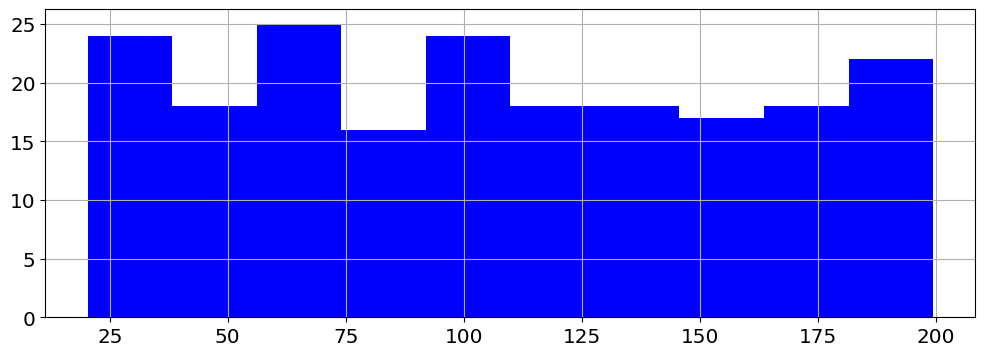

In [62]:
# Podemos ver que temos uma distribuição praticamente normal, com
# distribuição simétrica. (Média =  Mediana =  Moda)

df_ajustado['Preço_Unidade (R$)'].hist(color = 'blue')

<Axes: >

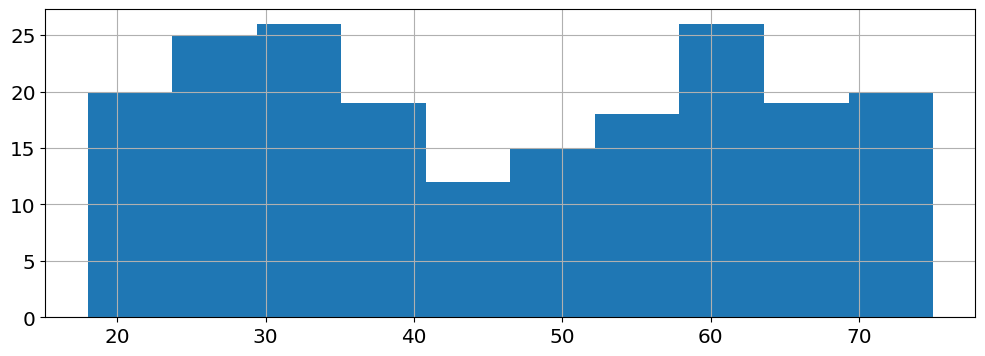

In [63]:
df_ajustado['Idade_Cliente'].hist()

### Variáveis Categóricas

In [64]:
df_ajustado[cats].describe()

,id_cliente,cnpj,razao_social,dt_cadastro,porte,regiao,segmento,desempenho,status,situacao,risco,Data_Compra,Título_Livro,Autor,Editora,Modo_Envio,Genero,Setor_Armazenado,Canal_Compra,Prioridade_Produto
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,200,200,184,194,3,5,4,6,2,3,2,191,195,199,4,3,2,4,4,3
top,CLI0001,47.896.118/0001-73,CDN Cabeca ME,07/07/2023,Grande,Sul,Papelaria,F,Ativo,Autorizado,Alto,06/09/2020,Harum,Luísa Novaes,Editora A,Padrão,F,Setor D,Marketplace,Baixa
freq,1,1,3,2,73,48,60,43,100,72,139,2,2,2,61,101,118,52,68,80


## Geração de Insights com Gráficos:
Utilize Seaborn ou Matplotlib para gerar no mínimo 4 gráficos que
 ofereçam insights sobre o dataset. Exemplos:----
 Distribuição de Idade por Cargo.
 Média Salarial por Departamento.
 Avaliação de Desempenho por Tempo na Empresa.
 Comparação do Número de Funcionários Ativos e Desligados
 por Departamento.

In [65]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

<Axes: xlabel='Entregue_no_prazo', ylabel='count'>

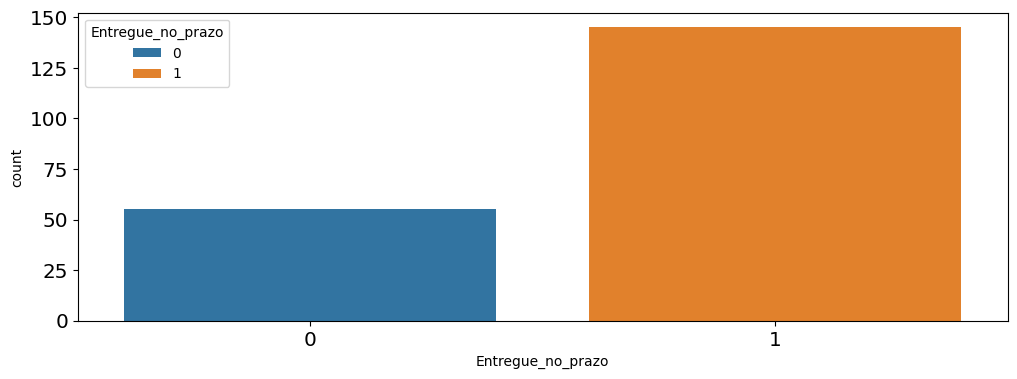

In [66]:
# Count Plot da variável target ()
sns.countplot(data = df_ajustado,
              x = df_ajustado['Entregue_no_prazo'],
              hue = 'Entregue_no_prazo')

### Análise Bivariada - Mapa de Correlação


In [67]:
# Monta a tabela com a correlação entre variáveis
corr_df_ajustado = df_ajustado[nums].corr()
corr_df_ajustado

,credito,tempo_empresa,Preço_Unidade (R$),Quantidade_Comprada,Idade_Cliente
credito,1.000000,-0.134481,0.111272,-0.033318,0.031697
tempo_empresa,-0.134481,1.000000,-0.042365,0.041226,0.065203
Preço_Unidade (R$),0.111272,-0.042365,1.000000,0.067126,-0.082420
Quantidade_Comprada,-0.033318,0.041226,0.067126,1.000000,-0.029416
Idade_Cliente,0.031697,0.065203,-0.082420,-0.029416,1.000000


<Axes: >

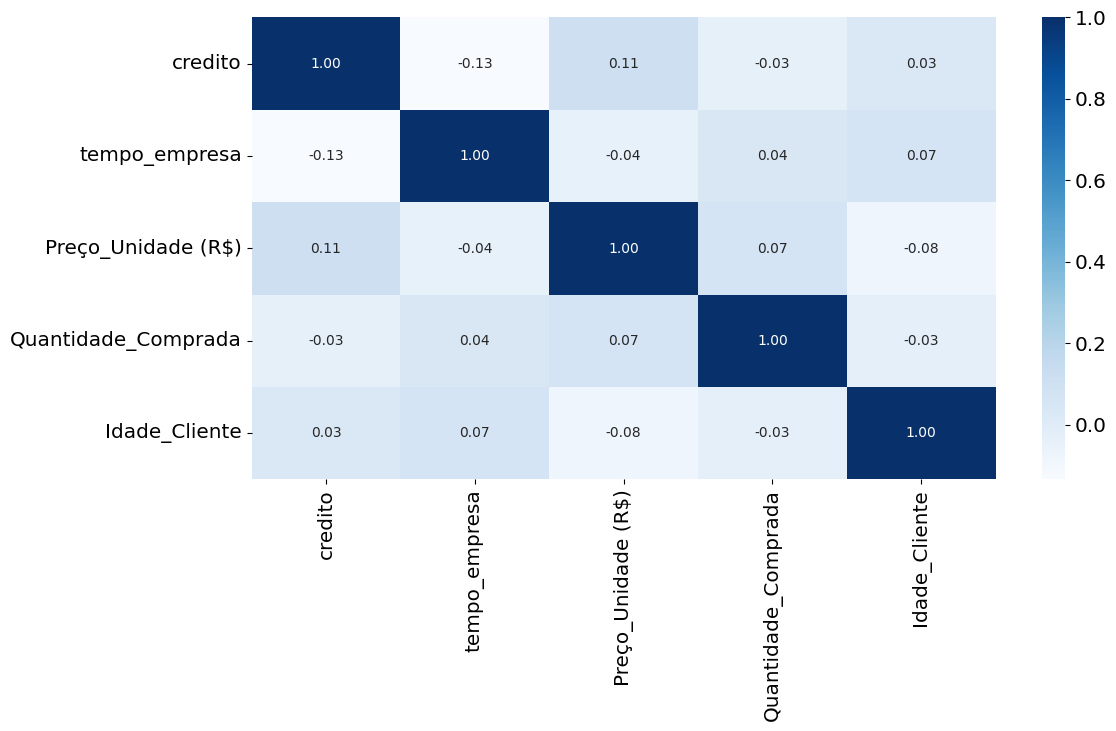

In [68]:
# Plotando um mapa de calor de correlação.

plt.figure(figsize = (12, 6))
sns.heatmap(corr_df_ajustado, cmap = 'Blues', annot = True, fmt = '.2f')


# Correlação vai de -1 a 1, onde:
# -1: forte correlação negativa(inversamente proporcional)
# 0: não há correlação alguma
# 1: forte correlação positiva

A partir do *mapa de correlação* acima, pode-se ver que:


* Há uma correlação levemente positiva entre `Crédito` e `Preço_unidade (R$)`.
* Há uma correlação levemente positiva entre `Quantidade_Comprada` e `Preço_unidade (R$)`.
* Há uma correlação fraca e levemente negativa entre `tempo_empresa` e `Idade_Cliente`.
* Há uma correlação negativa entre `Idade_Cliente` e `Preço_Unidade (R$)`.
* Há uma correlação muito fraca entre `tempo_empresa` e `Quantidade_Comprada`.
* E há uma correlação fraca entre as demais variáveis.


### Análise Univariada - ( Categórica )

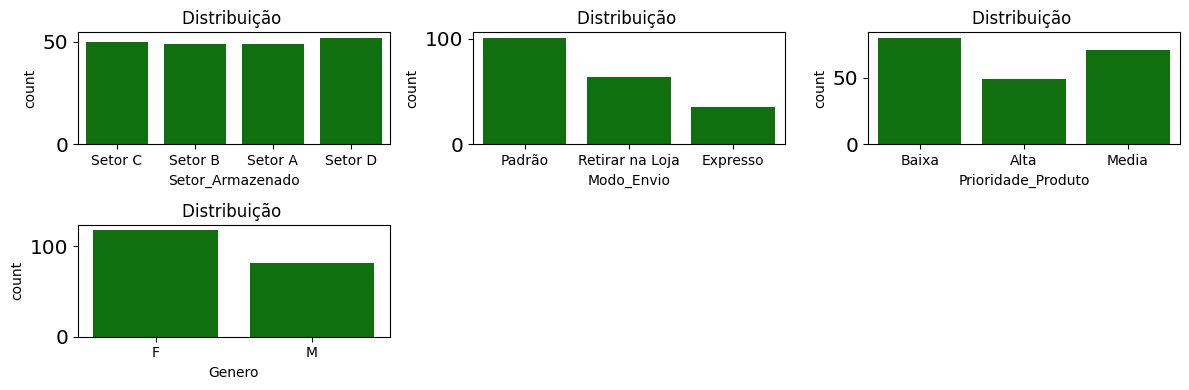

In [69]:
cats1 = [
    'Setor_Armazenado',
    'Modo_Envio',
    'Prioridade_Produto',
    'Genero',
]

# Criamos os valores anteriores em um count plot
df_sample = df_ajustado.sample(200, random_state = 42)

for i in range(0, len(cats1)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats1[i]], color = 'green', orient = 'v')
    plt.title("Distribuição ")
    plt.xticks(fontsize=10)
    plt.tight_layout()

### Colunas Categóricas x Variável Target

In [70]:
df_ajustado.columns

Index(['id_cliente', 'cnpj', 'razao_social', 'dt_cadastro', 'porte', 'regiao',
       'segmento', 'credito', 'desempenho', 'tempo_empresa', 'status',
       'situacao', 'risco', 'Data_Compra', 'Título_Livro', 'Autor', 'Editora',
       'Modo_Envio', 'Preço_Unidade (R$)', 'Quantidade_Comprada',
       'Idade_Cliente', 'Genero', 'Setor_Armazenado', 'Canal_Compra',
       'Prioridade_Produto', 'Entregue_no_prazo'],
      dtype='object')

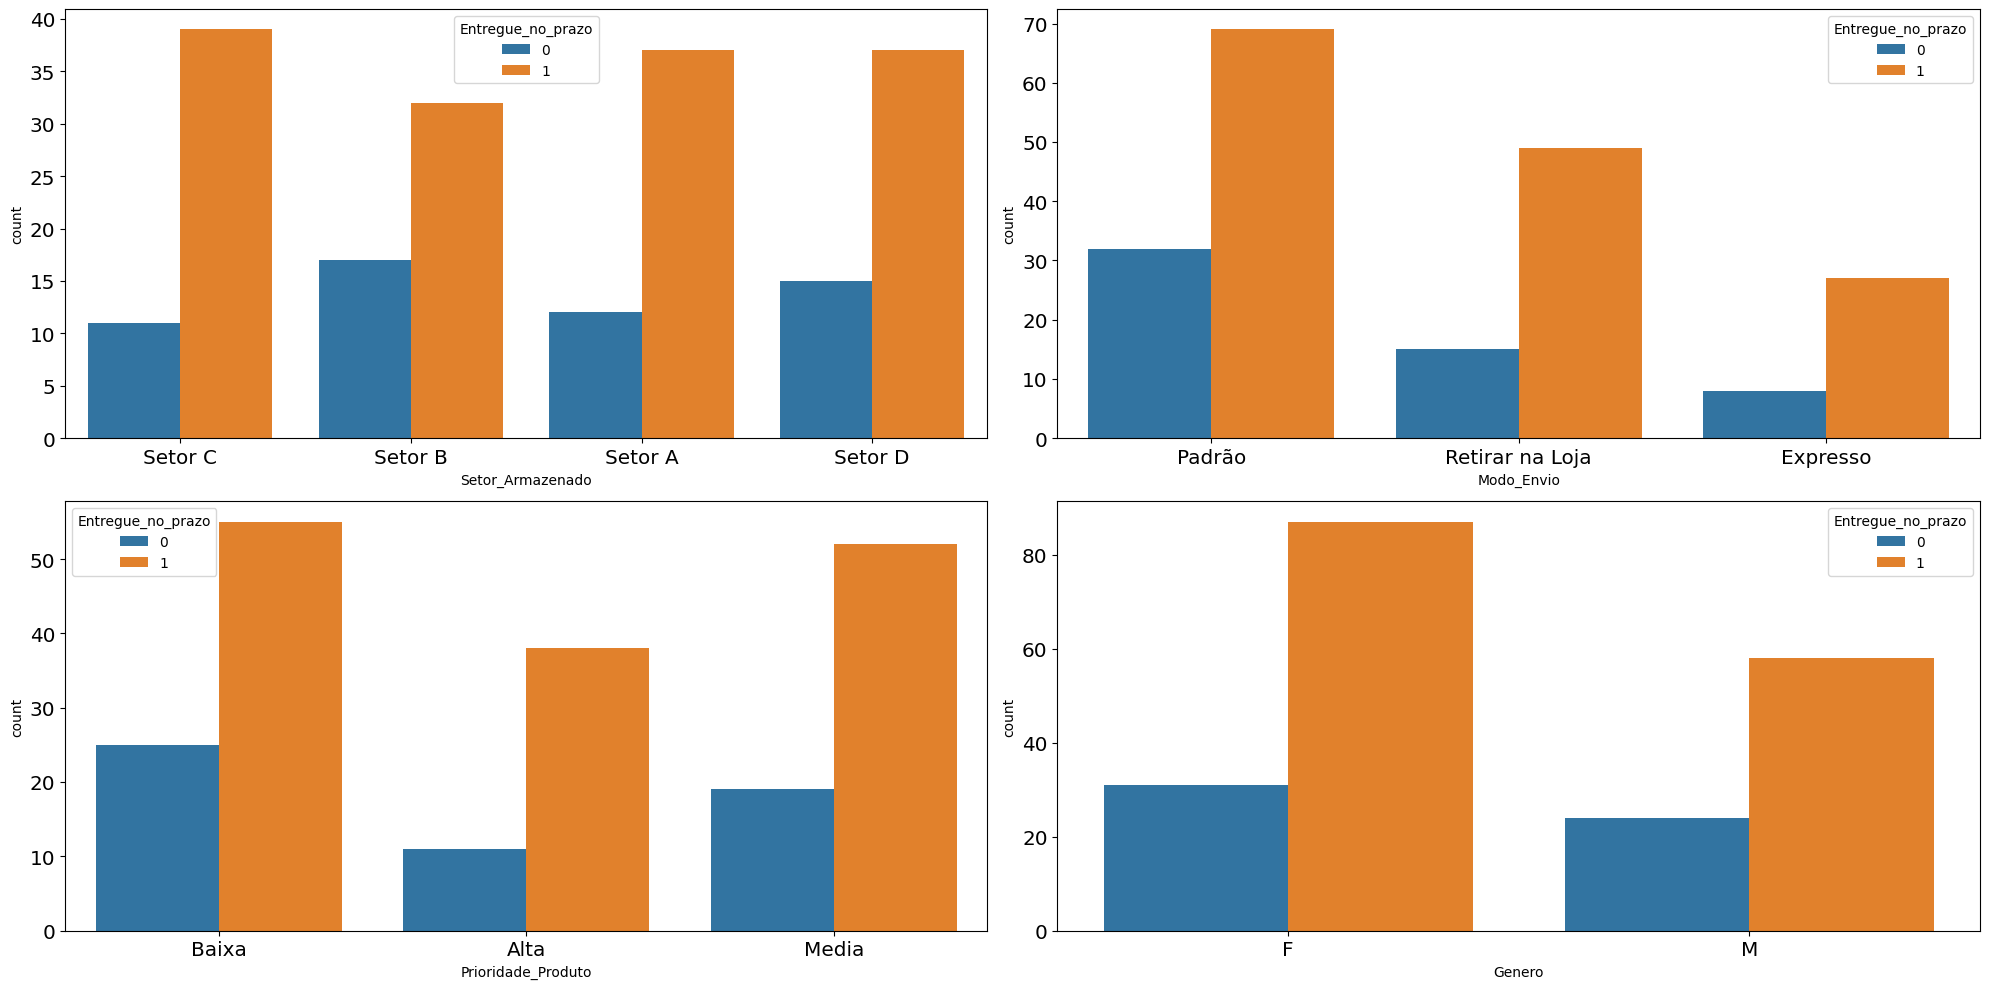

In [71]:
# Usamos o cruzamento entre coluna categórica e variável alvo para se ter
# resultados.
plt.figure(figsize = (20, 10))

# cats1 foi definida em 'Análise Univariada'
features = cats1


for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data = df_sample, x = features[i], hue = 'Entregue_no_prazo')
    plt.tight_layout()

Observações:

* Envio padrão tende a apresentar maior atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor B tendem a apresentar atraso na entrega.
* Produtos comprados por homens tem um volume ligeiramente menor de entregas feitas no prazo.

In [72]:
# Quantidade frequente por cada modo de envio
df_ajustado['Modo_Envio'].value_counts()

,count
Modo_Envio,
Padrão,101
Retirar na Loja,64
Expresso,35


* É possível observamos que o modo de Envio `Padrão` é o mais solicitado.
* Essa é uma decisão que possui vários fatores, como custos, se há uma grande prioridade ou não do cliente.

In [82]:
# Como agora estamos fazendo análise a nível de linha, podemos usar o ID para ter valores únicos.
# quando 0, não entregue  no prazo, quando 1, entregue no prazo.
df_group1 = df_ajustado.groupby(['Entregue_no_prazo', 'Modo_Envio']).agg({'id_cliente' : 'nunique'}).reset_index()
df_group1

,Entregue_no_prazo,Modo_Envio,id_cliente
0,0,Expresso,8
1,0,Padrão,32
2,0,Retirar na Loja,15
3,1,Expresso,27
4,1,Padrão,69
5,1,Retirar na Loja,49


In [83]:
# 0: não entregue no prazo
# 1: entregue no prazo
df_group2 = df_ajustado.groupby('Entregue_no_prazo').agg({'id_cliente' : 'nunique'}).reset_index()
df_group2

,Entregue_no_prazo,id_cliente
0,0,55
1,1,145


* A maioria dos cliente estão com as entregas feitas dentro do prazo, isso equivale a mais de 70% de eficiência, que é algo muito bom.


* É super importante também que a empresa entenda as causas dos atrasos, e estudar maneiras de reduzir, já que isso possui forte impacto, pode ser necessário contratar outro serviço de entrega, ou dar atenção para qual tipo de transporte está sendo feito o envio, e estudar todo o custo com a logística.

In [84]:
# Agrupando o modo de envio solicitado por cada cliente
df_group4 = df.groupby('Modo_Envio').agg({'id_cliente' : 'nunique'}).reset_index()
df_group4

,Modo_Envio,id_cliente
0,Expresso,35
1,Padrão,101
2,Retirar na Loja,64


In [94]:
# ID_y é o total da categoria modo envio
df_group5 = df_group1.merge(df_group4, on = 'Modo_Envio')
df_group5

# Calculando a proporção(percentual), e grava em uma nova coluna
df_group5['Percentual(%)'] = df_group5['id_cliente_x'] / df_group5['id_cliente_y'] * 100
df_group5

,Entregue_no_prazo,Modo_Envio,id_cliente_x,id_cliente_y,Percentual(%)
0,0,Expresso,8,35,22.857143
1,0,Padrão,32,101,31.683168
2,0,Retirar na Loja,15,64,23.437500
3,1,Expresso,27,35,77.142857
4,1,Padrão,69,101,68.316832
5,1,Retirar na Loja,49,64,76.562500


* Fatores como prioridade e custo também influenciam nesta tomada de decisão.

### Entrega x Modo de Envio

In [92]:
# Criação do gráfico com Plotly Express
fig = px.histogram(df_ajustado,
                   x = 'Modo_Envio',
                   color = 'Entregue_no_prazo',  # Diferenciar pela variável 'Entregue_no_prazo',
                   barmode = 'group',  # Adicionado para barras lado a lado
                   category_orders = {'Modo_Envio': ['Aviao', 'Caminhao', 'Navio']},  # Ordem dos valores
                   color_discrete_map = {0: 'green', 1: 'red'},  # Atribui as cores (verde para 0, vermelho para 1)
                   title = "Entregas com Base no Modo de Envio (Absoluto)",
                   labels = {"Modo_Envio": "Modo de Envio", "count": "Total"},
                   height = 600, width=1000)  # Tamanho do gráfico

# Adicionando um subtítulo (anotação) abaixo do título
fig.add_annotation(
    x = 0.5,
    y = 1.05,  # Colocando um pouco acima do título
    text = "Todos os modos de envio possuem atraso, porém o tipo Padrão ainda é o que mais gera atrasos.",
    showarrow = False,
    font = dict(size = 16, color = "black"),
    align = "center",
    opacity = 0.85,
    xref = "paper",
    yref = "paper"
)

# Ajuste da legenda
fig.update_layout(
    legend_title = "Status",
    legend = dict(x = 0.75, y = 0.95),  # Posição da legenda
    title_x = 0.5,  # Centralizando o título
    title_font = dict(size = 25, family = "Arial, sans-serif", color = "black", weight = "bold"),
    xaxis_title = "Modo de Envio",
    yaxis_title = "Total",
)

# Exibindo o gráfico
fig.show()


In [95]:
# Criação do gráfico com Plotly Express
fig = px.histogram(df_group5,
                   x = 'Modo_Envio',
                   y = 'Percentual(%)',
                   color = 'Entregue_no_prazo',  # Diferenciar pela variável 'Entregue_no_prazo',
                   barmode = 'group',  # Adicionado para barras lado a lado
                   category_orders = {'Modo_Envio': ['Aviao', 'Caminhao', 'Navio']},  # Ordem dos valores
                   color_discrete_map = {0: 'green', 1: 'red'},  # Atribui as cores (verde para 0, vermelho para 1)
                   title = "Entregas com Base no Modo de Envio (Absoluto)",
                   labels = {"Modo_Envio": "Modo de Envio", "count": "Total"},
                   height = 600, width=1000)  # Tamanho do gráfico

# Adicionando um subtítulo (anotação) abaixo do título
fig.add_annotation(
    x = 0.5,
    y = 1.05,  # Colocando um pouco acima do título
    text = "Todos os modos de envio possuem atraso, porém o tipo Padrão ainda é o que mais gera atrasos.",
    showarrow = False,
    font = dict(size = 16, color = "black"),
    align = "center",
    opacity = 0.85,
    xref = "paper",
    yref = "paper"
)

# Ajuste da legenda
fig.update_layout(
    legend_title = "Status",
    legend = dict(x = 0.75, y = 0.95),  # Posição da legenda
    title_x = 0.5,  # Centralizando o título
    title_font = dict(size = 25, family = "Arial, sans-serif", color = "black", weight = "bold"),
    xaxis_title = "Modo de Envio",
    yaxis_title = "Total",
)

# Exibindo o gráfico
fig.show()


* A Partir da Análise Percentual obtemos resultados mais exatos para esta situação, onde os atrasos para Expresso e Retirar na Loja são praticamente os mesmos.

* Nota-se também que os atrasos para Modo de Envio não são tão discrepantes em relação aos demais. O que cabe a empresa averiguar a forma de envio.
